In [3]:
# <-- Import libraries, custom functions, and load configuration & datasets <-- #

import yaml
import datetime as dt
import re
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns

from statsmodels.multivariate.manova import MANOVA
from scipy import stats
from scipy.stats import pearsonr, boxcox, chi2_contingency, shapiro, probplot
from scipy.stats.contingency import association

sns.set(style="whitegrid")

# <-- Imports custom preprocessing functions from 'functions.py' <-- #

# from functions import ()

# <-- Loads YAML configuration to dynamically reference CSV output files. <-- #

config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")


# df_demo = pd.read_csv(config['output_data']['file1'])
df_demo_variation = pd.read_csv(config['output_data']['file2'])
df_demo_test = pd.read_csv(config['output_data']['file3'])
df_demo_control = pd.read_csv(config['output_data']['file4'])

In [4]:
display(pd.DataFrame({
    "non_nulls": df_demo_variation.count(),
    "nulls": df_demo_variation.isnull().sum(),
    "total": len(df_demo_variation)
}))
print(df_demo_variation.dtypes)

,non_nulls,nulls,total
client_id,50487,0,50487
clnt_tenure_yr,50487,0,50487
clnt_tenure_mnth,50487,0,50487
clnt_age,50487,0,50487
num_accts,50487,0,50487
bal,50487,0,50487
calls_6_mnth,50487,0,50487
logons_6_mnth,50487,0,50487
Variation,50487,0,50487
clnt_age_quantile,50487,0,50487


client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
Variation             object
clnt_age_quantile     object
tenure_quantile       object
dtype: object


In [5]:
display(pd.DataFrame({
    "non_nulls": df_demo_control.count(),
    "nulls": df_demo_control.isnull().sum(),
    "total": len(df_demo_control)
}))
print(df_demo_control.dtypes)

,non_nulls,nulls,total
client_id,23526,0,23526
clnt_tenure_yr,23526,0,23526
clnt_tenure_mnth,23526,0,23526
clnt_age,23526,0,23526
num_accts,23526,0,23526
bal,23526,0,23526
calls_6_mnth,23526,0,23526
logons_6_mnth,23526,0,23526
Variation,23526,0,23526
clnt_age_quantile,23526,0,23526


client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
Variation             object
clnt_age_quantile     object
tenure_quantile       object
dtype: object


In [6]:
display(pd.DataFrame({
    "non_nulls": df_demo_test.count(),
    "nulls": df_demo_test.isnull().sum(),
    "total": len(df_demo_test)
}))
print(df_demo_test.dtypes)

,non_nulls,nulls,total
client_id,26961,0,26961
clnt_tenure_yr,26961,0,26961
clnt_tenure_mnth,26961,0,26961
clnt_age,26961,0,26961
num_accts,26961,0,26961
bal,26961,0,26961
calls_6_mnth,26961,0,26961
logons_6_mnth,26961,0,26961
Variation,26961,0,26961
clnt_age_quantile,26961,0,26961


client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
Variation             object
clnt_age_quantile     object
tenure_quantile       object
dtype: object


**1) Age: histograms and boxplots by group**

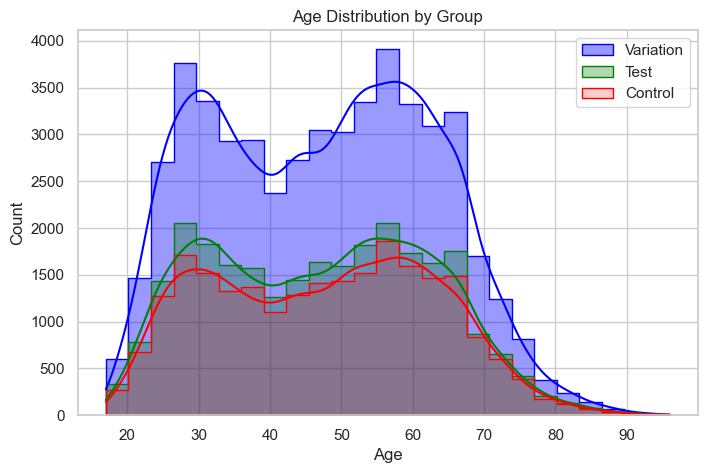

In [7]:
# # Side-by-side: histograms
# fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
# sns.histplot(df_demo_variation['clnt_age'].dropna(), bins=25, kde=True, ax=axes[0])
# axes[0].set_title("Variation — Age (hist)")
# axes[0].set_xlabel("Age")
# axes[0].set_ylabel("Count")
# sns.histplot(df_demo_test['clnt_age'].dropna(), bins=25, kde=True, ax=axes[1])
# axes[1].set_title("Test — Age (hist)")
# axes[1].set_xlabel("Age")
# axes[1].set_ylabel("")
# sns.histplot(df_demo_control['clnt_age'].dropna(), bins=25, kde=True, ax=axes[2])
# axes[2].set_title("Control — Age (hist)")
# axes[2].set_xlabel("Age")
# axes[2].set_ylabel("")
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8, 5))

sns.histplot(df_demo_variation['clnt_age'].dropna(), bins=25, kde=True, color='blue', label='Variation', element="step", stat="count", alpha=0.4)
sns.histplot(df_demo_test['clnt_age'].dropna(), bins=25, kde=True, color='green', label='Test', element="step", stat="count", alpha=0.3)
sns.histplot(df_demo_control['clnt_age'].dropna(), bins=25, kde=True, color='red', label='Control', element="step", stat="count", alpha=0.2)

plt.title("Age Distribution by Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


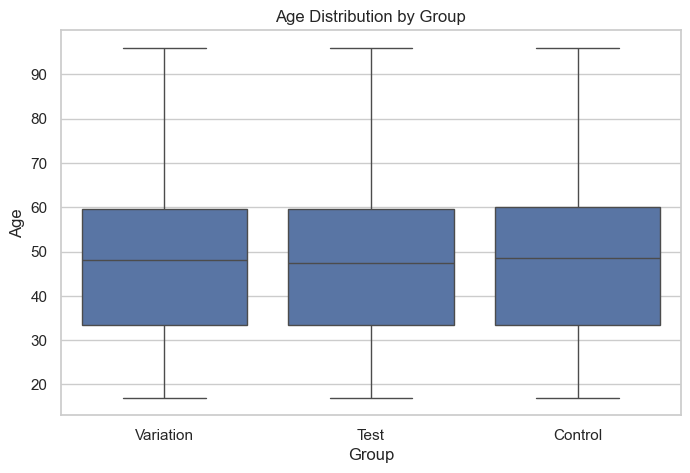

In [8]:
# # Side-by-side: boxplots
# fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
# sns.boxplot(x=df_demo_variation['clnt_age'].dropna(), ax=axes[0])
# axes[0].set_title("Variation — Age (box)")
# axes[0].set_xlabel("Age")
# sns.boxplot(x=df_demo_test['clnt_age'].dropna(), ax=axes[1])
# axes[1].set_title("Test — Age (box)")
# axes[1].set_xlabel("Age")
# sns.boxplot(x=df_demo_control['clnt_age'].dropna(), ax=axes[2])
# axes[2].set_title("Control — Age (box)")
# axes[2].set_xlabel("Age")
# plt.tight_layout()
# plt.show()

# Combine data into one DataFrame
df_age_combined = pd.concat([
    pd.DataFrame({'Age': df_demo_variation['clnt_age'].dropna(), 'Group': 'Variation'}),
    pd.DataFrame({'Age': df_demo_test['clnt_age'].dropna(), 'Group': 'Test'}),
    pd.DataFrame({'Age': df_demo_control['clnt_age'].dropna(), 'Group': 'Control'})
])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Group', y='Age', data=df_age_combined)
plt.title('Age Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Age')
plt.show()

**2) Tenure: histograms by group**

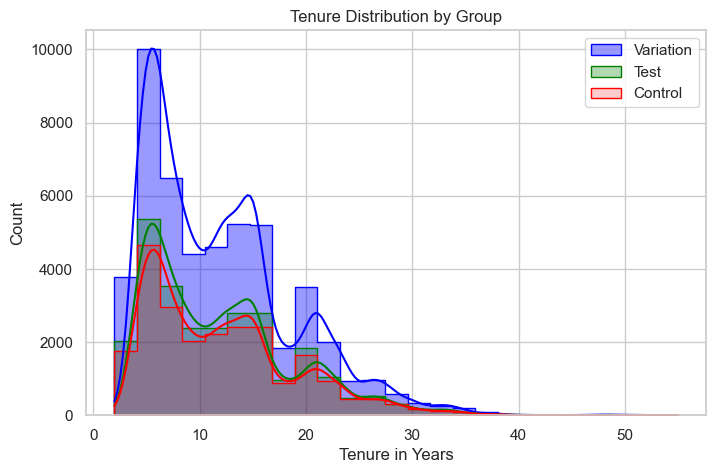

In [9]:
# Side-by-side: histograms
# fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
# sns.histplot(df_demo_variation['clnt_tenure_yr'].dropna(), bins=25, kde=True, ax=axes[0])
# axes[0].set_title("Variation — Tenure (years)")
# axes[0].set_xlabel("Years")
# axes[0].set_ylabel("Count")
# sns.histplot(df_demo_test['clnt_tenure_yr'].dropna(), bins=25, kde=True, ax=axes[1])
# axes[1].set_title("Test — Tenure (years)")
# axes[1].set_xlabel("Years")
# sns.histplot(df_demo_control['clnt_tenure_yr'].dropna(), bins=25, kde=True, ax=axes[2])
# axes[2].set_title("Control — Tenure (years)")
# axes[2].set_xlabel("Years")
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8, 5))

sns.histplot(df_demo_variation['clnt_tenure_yr'].dropna(), bins=25, kde=True, color='blue', label='Variation', element="step", stat="count", alpha=0.4)
sns.histplot(df_demo_test['clnt_tenure_yr'].dropna(), bins=25, kde=True, color='green', label='Test', element="step", stat="count", alpha=0.3)
sns.histplot(df_demo_control['clnt_tenure_yr'].dropna(), bins=25, kde=True, color='red', label='Control', element="step", stat="count", alpha=0.2)

plt.title("Tenure Distribution by Group")
plt.xlabel("Tenure in Years")
plt.ylabel("Count")
plt.legend()
plt.show()


**3) Logins: general distribution by group (hist + box)**

C:\Users\pablo\AppData\Local\Temp\ipykernel_11168\2898518145.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


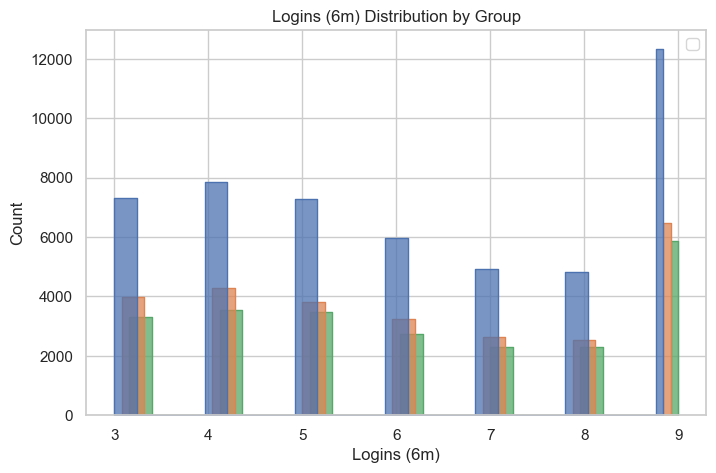

In [10]:
# # Side-by-side: histograms
# plt.figure(figsize=(15,4))
# plt.subplot(1,3,1)
# sns.histplot(df_demo_variation['logons_6_mnth'].dropna(), bins=5)
# plt.title("Variation — Logins (6m)")
# plt.xlabel("Logins (6 months)")
# plt.subplot(1,3,2)
# sns.histplot(df_demo_test['logons_6_mnth'].dropna(), bins=5)
# plt.title("Test — Logins (6m)")
# plt.xlabel("Logins (6 months)")
# plt.subplot(1,3,3)
# sns.histplot(df_demo_control['logons_6_mnth'].dropna(), bins=5)
# plt.title("Control — Logins (6m)")
# plt.xlabel("Logins (6 months)")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(8, 5))
# sns.histplot(df_demo_variation['logons_6_mnth'].dropna(), bins=25, kde=True, color='blue', label='Variation', element="step", stat="count", alpha=0.4)
# sns.histplot(df_demo_test['logons_6_mnth'].dropna(), bins=25, kde=True, color='green', label='Test', element="step", stat="count", alpha=0.3)
# sns.histplot(df_demo_control['logons_6_mnth'].dropna(), bins=25, kde=True, color='red', label='Control', element="step", stat="count", alpha=0.2)
# plt.title("Logins distribution by group")
# plt.xlabel("Logins (6m)")
# plt.ylabel("Count")
# plt.legend()
# plt.show()

# Combine data into one DataFrame
df_plot = pd.concat([
    df_demo_variation[['logons_6_mnth']].assign(Group='Variation'),
    df_demo_test[['logons_6_mnth']].assign(Group='Test'),
    df_demo_control[['logons_6_mnth']].assign(Group='Control')
])

plt.figure(figsize=(8, 5))
sns.histplot(data=df_plot, x='logons_6_mnth', hue='Group', bins=25, multiple='dodge', stat='count', element='step')
plt.title("Logins (6m) Distribution by Group")
plt.xlabel("Logins (6m)")
plt.ylabel("Count")
plt.legend()
plt.show()

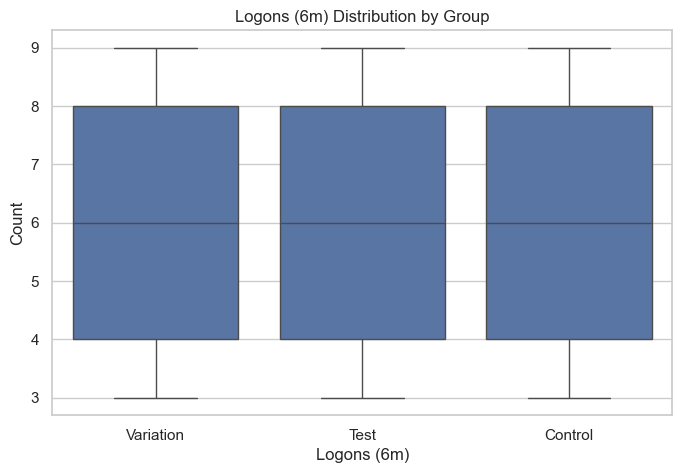

In [11]:
# # Side-by-side: boxplots
# plt.figure(figsize=(15,4))
# plt.subplot(1,3,1)
# sns.boxplot(x=df_demo_variation['logons_6_mnth'].dropna())
# plt.title("Variation — Logins (6m) (box)")
# plt.xlabel("Logins (6 months)")
# plt.subplot(1,3,2)
# sns.boxplot(x=df_demo_test['logons_6_mnth'].dropna())
# plt.title("Test — Logins (6m) (box)")
# plt.xlabel("Logins (6 months)")
# plt.subplot(1,3,3)
# sns.boxplot(x=df_demo_control['logons_6_mnth'].dropna())
# plt.title("Control — Logins (6m) (box)")
# plt.xlabel("Logins (6 months)")
# plt.show()

# Combine data into one DataFrame
df_age_combined = pd.concat([
    pd.DataFrame({'Logon': df_demo_variation['logons_6_mnth'].dropna(), 'Group': 'Variation'}),
    pd.DataFrame({'Logon': df_demo_test['logons_6_mnth'].dropna(), 'Group': 'Test'}),
    pd.DataFrame({'Logon': df_demo_control['logons_6_mnth'].dropna(), 'Group': 'Control'})
])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Group', y='Logon', data=df_age_combined)
plt.title("Logons (6m) Distribution by Group")
plt.xlabel("Logons (6m)")
plt.ylabel("Count")
plt.show()

**4) Calls: distribution and outliers by group (box)**

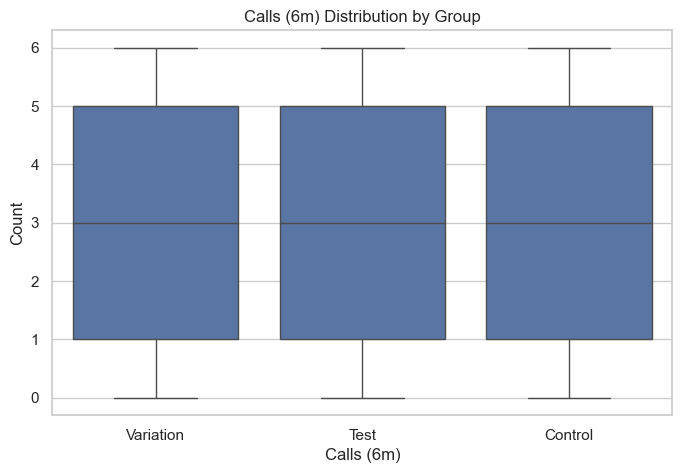

In [12]:
# # Side-by-side: boxplots
# plt.figure(figsize=(15,4))
# plt.subplot(1,3,1)
# sns.boxplot(x=df_demo_variation['calls_6_mnth'].dropna())
# plt.title("Variation — Calls (6m) (box)")
# plt.xlabel("Calls (6 months)")
# plt.subplot(1,3,2)
# sns.boxplot(x=df_demo_test['calls_6_mnth'].dropna())
# plt.title("Test — Calls (6m) (box)")
# plt.xlabel("Calls (6 months)")
# plt.subplot(1,3,3)
# sns.boxplot(x=df_demo_control['calls_6_mnth'].dropna())
# plt.title("Control — Calls (6m) (box)")
# plt.xlabel("Calls (6 months)")
# plt.show()

# Combine data into one DataFrame
df_age_combined = pd.concat([
    pd.DataFrame({'Calls': df_demo_variation['calls_6_mnth'].dropna(), 'Group': 'Variation'}),
    pd.DataFrame({'Calls': df_demo_test['calls_6_mnth'].dropna(), 'Group': 'Test'}),
    pd.DataFrame({'Calls': df_demo_control['calls_6_mnth'].dropna(), 'Group': 'Control'})
])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Group', y='Calls', data=df_age_combined)
plt.title("Calls (6m) Distribution by Group")
plt.xlabel("Calls (6m)")
plt.ylabel("Count")
plt.show()

**5) Balance: hist with log scale + boxplot (log)**

**Why use log scale for balance?**
- Balances are highly skewed: Most clients have small/medium balances, but a few have very large ones (outliers).
- Log transformation compresses large values and spreads out small ones, so we can see the full distribution (otherwise, the histogram would be "squished" on the left, and the right tail would dominate).
- **Interpretation:** Each unit on the x-axis is a power of 10 (e.g., log10($1,000) = 3, log10($10,000) = 4, etc.).
- Makes comparison easier between groups by focusing on distribution shape rather than being overwhelmed by outliers.
- **Summary:**
- Log scale is used here because client balances span several orders of magnitude. Taking the log makes the visualization more informative and readable

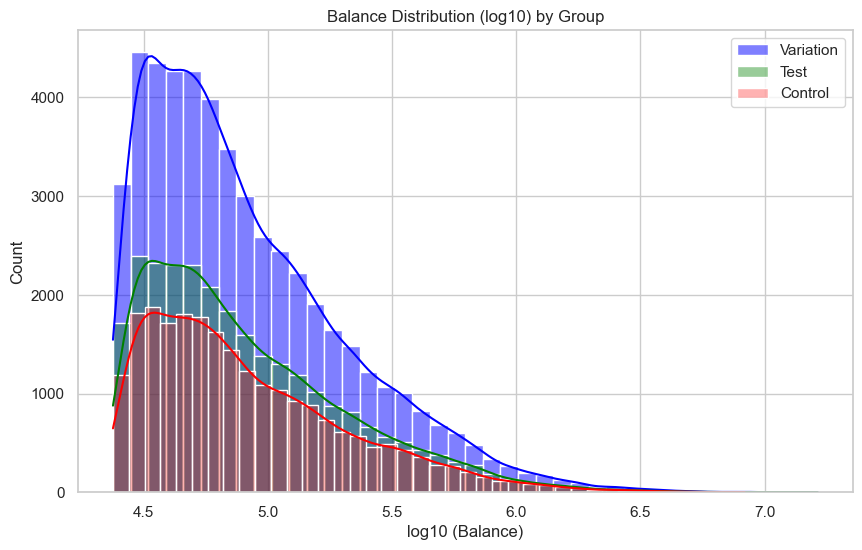

In [13]:
# # Side-by-side: histograms (log10)
# fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
# bal_v = df_demo_variation['bal'].dropna()
# bal_v = bal_v[bal_v>0]  # avoid log of 0 or negative
# sns.histplot(np.log10(bal_v), bins=40, kde=True, ax=axes[0])
# axes[0].set_title("Variation — Balance (log10) (hist)")
# axes[0].set_xlabel("log10(Balance)")
# plt.subplot(1,3,2)
# bal_t = df_demo_test['bal'].dropna()
# bal_t = bal_t[bal_t>0]  # avoid log of 0 or negative
# sns.histplot(np.log10(bal_t), bins=40, kde=True, ax=axes[1])
# axes[1].set_title("Test — Balance (log10) (hist)")
# axes[1].set_xlabel("log10(Balance)")
# plt.subplot(1,3,3)
# bal_c = df_demo_control['bal'].dropna()
# bal_c = bal_c[bal_c>0]  # avoid log of 0 or negative
# sns.histplot(np.log10(bal_c), bins=40, kde=True, ax=axes[2])
# axes[2].set_title("Control — Balance (log10) (hist)")
# axes[2].set_xlabel("log10(Balance)")
# plt.show()

plt.figure(figsize=(10, 6))

# Prepare log10 balances for each group, ensuring no zero or negative values
bal_v = df_demo_variation['bal'].dropna()
bal_v = bal_v[bal_v > 0]
bal_t = df_demo_test['bal'].dropna()
bal_t = bal_t[bal_t > 0]
bal_c = df_demo_control['bal'].dropna()
bal_c = bal_c[bal_c > 0]

# Overlay histograms
sns.histplot(np.log10(bal_v), bins=40, kde=True, color='blue', label='Variation', stat='count', alpha=0.5)
sns.histplot(np.log10(bal_t), bins=40, kde=True, color='green', label='Test', stat='count', alpha=0.4)
sns.histplot(np.log10(bal_c), bins=40, kde=True, color='red', label='Control', stat='count', alpha=0.3)

plt.xlabel('log10 (Balance)')
plt.ylabel('Count')
plt.title('Balance Distribution (log10) by Group')
plt.legend()
plt.show()

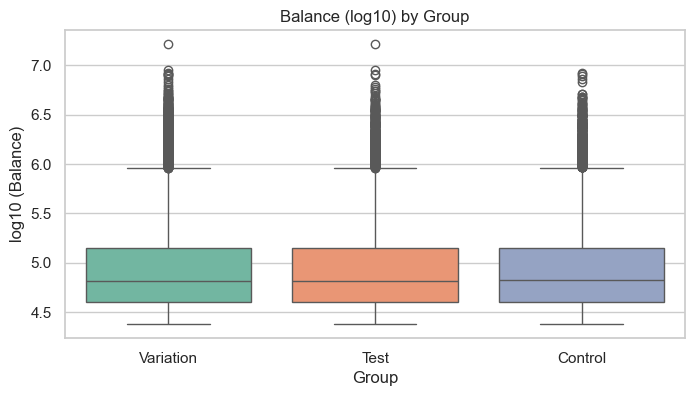

In [14]:
# # Side-by-side: boxplots (log10)
# plt.figure(figsize=(15,4))
# plt.subplot(1,3,1)
# bal_v = df_demo_variation['bal'].dropna()
# sns.boxplot(x=np.log10(bal_v))
# plt.title("Variation — Balance (log10) (box)")
# plt.xlabel("log10(Balance)")
# plt.subplot(1,3,2)
# bal_t = df_demo_test['bal'].dropna()
# sns.boxplot(x=np.log10(bal_t))
# plt.title("Test — Balance (log10) (box)")
# plt.xlabel("log10(Balance)")
# plt.subplot(1,3,3)
# bal_c = df_demo_control['bal'].dropna()
# sns.boxplot(x=np.log10(bal_c))
# plt.title("Control — Balance (log10) (box)")
# plt.xlabel("log10(Balance)")
# plt.show()

df_v = df_demo_variation[['bal']].dropna().assign(group='Variation')
df_t = df_demo_test[['bal']].dropna().assign(group='Test')
df_c = df_demo_control[['bal']].dropna().assign(group='Control')

# Concatenate into one DataFrame
df_box = pd.concat([df_v, df_t, df_c], ignore_index=True)
df_box['log10_bal'] = np.log10(df_box['bal'])

plt.figure(figsize=(8,4))
sns.boxplot(x='group', y='log10_bal', data=df_box, hue='group', legend=False, palette="Set2")
plt.title("Balance (log10) by Group")
plt.xlabel("Group")
plt.ylabel("log10 (Balance)")
plt.show()

**6) Correlation heatmap (by group)**

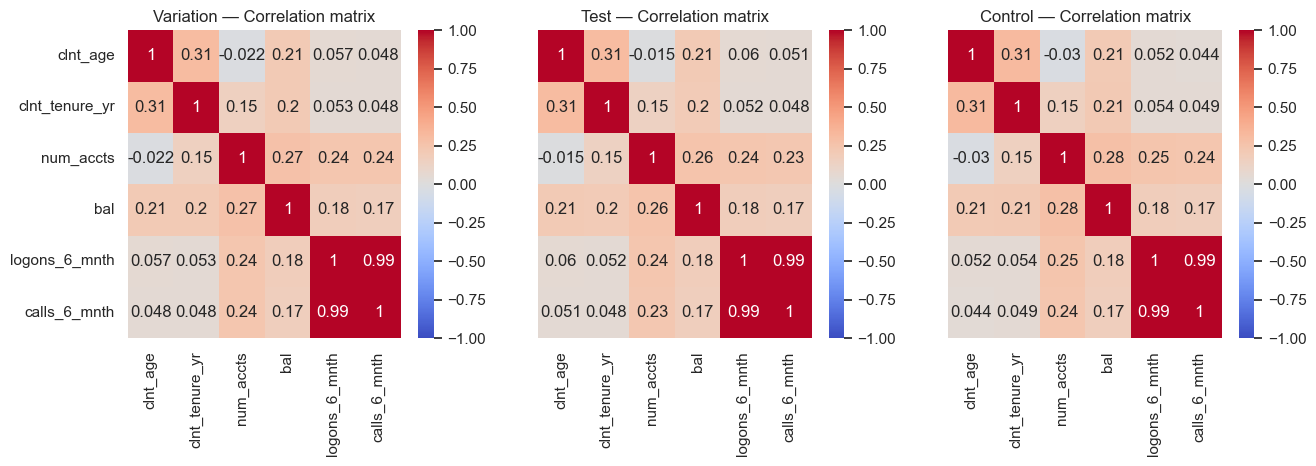

In [15]:
cols = ['clnt_age','clnt_tenure_yr','num_accts','bal','logons_6_mnth','calls_6_mnth']
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

corr_v = df_demo_variation[cols].corr()
sns.heatmap(corr_v, annot=True, vmin=-1, vmax=1, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Variation — Correlation matrix")

corr_t = df_demo_test[cols].corr()
sns.heatmap(corr_t, annot=True, vmin=-1, vmax=1, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Test — Correlation matrix")

corr_c = df_demo_control[cols].corr()
sns.heatmap(corr_c, annot=True, vmin=-1, vmax=1, cmap="coolwarm", ax=axes[2])
axes[2].set_title("Control — Correlation matrix")

plt.show()

**7) Logins by age quantiles (to see younger vs. older)**

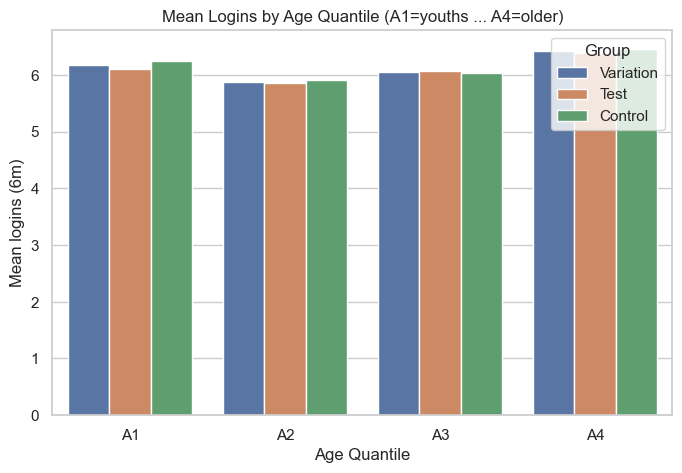

In [16]:
# # Side-by-side: barplots
# fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
# tmp_group_variation = df_demo_variation.groupby('clnt_age_quantile')['logons_6_mnth'].mean().reset_index()
# sns.barplot(data=tmp_group_variation, x='clnt_age_quantile', y='logons_6_mnth', ax=axes[0])
# axes[0].set_title("Mean Logins by Age Quantile (0=youths ... 4=older)")
# axes[0].set_xlabel("Variation group - Age quantile")
# axes[0].set_ylabel("Mean logins (6m)")
# tmp_group_test = df_demo_test.groupby('clnt_age_quantile')['logons_6_mnth'].mean().reset_index()
# sns.barplot(data=tmp_group_test, x='clnt_age_quantile', y='logons_6_mnth', ax=axes[1])
# axes[1].set_title("Mean Logins by Age Quantile (0=youths ... 4=older)")
# axes[1].set_xlabel("Test group - Age quantile")
# tmp_group_control = df_demo_control.groupby('clnt_age_quantile')['logons_6_mnth'].mean().reset_index()
# sns.barplot(data=tmp_group_control, x='clnt_age_quantile', y='logons_6_mnth', ax=axes[2])
# axes[2].set_title("Mean Logins by Age Quantile (0=youths ... 4=older)")
# axes[2].set_xlabel("Control group - Age quantile")
# plt.show()

# Calculate means for each group
tmp_group_variation = df_demo_variation.groupby('clnt_age_quantile')['logons_6_mnth'].mean().reset_index()
tmp_group_variation['group'] = 'Variation'
tmp_group_test = df_demo_test.groupby('clnt_age_quantile')['logons_6_mnth'].mean().reset_index()
tmp_group_test['group'] = 'Test'
tmp_group_control = df_demo_control.groupby('clnt_age_quantile')['logons_6_mnth'].mean().reset_index()
tmp_group_control['group'] = 'Control'

# Combine into one dataframe
df_bar = pd.concat([tmp_group_variation, tmp_group_test, tmp_group_control])

plt.figure(figsize=(8,5))
sns.barplot(data=df_bar, x='clnt_age_quantile', y='logons_6_mnth', hue='group', dodge=True)
plt.title("Mean Logins by Age Quantile (A1=youths ... A4=older)")
plt.xlabel("Age Quantile")
plt.ylabel("Mean logins (6m)")
plt.legend(title="Group")
plt.show()


**7) Calls by age quantiles (to see younger vs. older)**

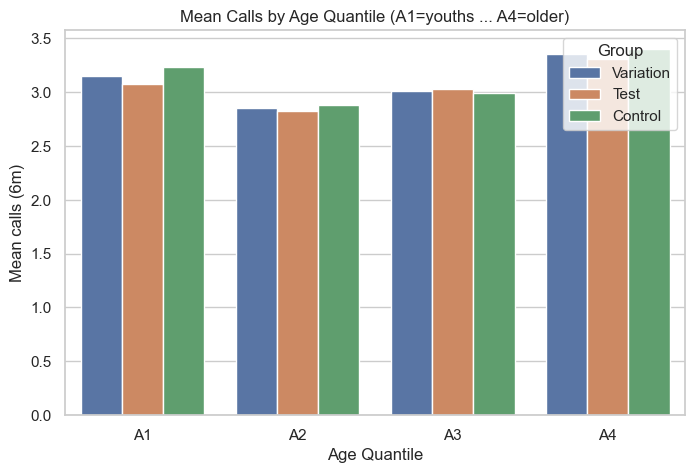

In [17]:
# # Side-by-side: barplots
# fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
# tmp_group_variation = df_demo_variation.groupby('clnt_age_quantile')['calls_6_mnth'].mean().reset_index()
# sns.barplot(data=tmp_group_variation, x='clnt_age_quantile', y='calls_6_mnth', ax=axes[0])
# axes[0].set_title("Mean Logins by Age Quantile (0=youths ... 4=older)")
# axes[0].set_xlabel("Variation group - Age quantile")
# axes[0].set_ylabel("Mean logins (6m)")
# tmp_group_test = df_demo_test.groupby('clnt_age_quantile')['calls_6_mnth'].mean().reset_index()
# sns.barplot(data=tmp_group_test, x='clnt_age_quantile', y='calls_6_mnth', ax=axes[1])
# axes[1].set_title("Mean Logins by Age Quantile (0=youths ... 4=older)")
# axes[1].set_xlabel("Test group - Age quantile")
# tmp_group_control = df_demo_control.groupby('clnt_age_quantile')['calls_6_mnth'].mean().reset_index()
# sns.barplot(data=tmp_group_control, x='clnt_age_quantile', y='calls_6_mnth', ax=axes[2])
# axes[2].set_title("Mean Calls by Age Quantile (0=youths ... 4=older)")
# axes[2].set_xlabel("Control group - Age quantile")
# plt.show()

# Calculate means for each group
tmp_group_variation = df_demo_variation.groupby('clnt_age_quantile')['calls_6_mnth'].mean().reset_index()
tmp_group_variation['group'] = 'Variation'
tmp_group_test = df_demo_test.groupby('clnt_age_quantile')['calls_6_mnth'].mean().reset_index()
tmp_group_test['group'] = 'Test'
tmp_group_control = df_demo_control.groupby('clnt_age_quantile')['calls_6_mnth'].mean().reset_index()
tmp_group_control['group'] = 'Control'

# Combine into one dataframe
df_bar = pd.concat([tmp_group_variation, tmp_group_test, tmp_group_control])

plt.figure(figsize=(8,5))
sns.barplot(data=df_bar, x='clnt_age_quantile', y='calls_6_mnth', hue='group', dodge=True)
plt.title("Mean Calls by Age Quantile (A1=youths ... A4=older)")
plt.xlabel("Age Quantile")
plt.ylabel("Mean calls (6m)")
plt.legend(title="Group")
plt.show()

**8) More tenure ⇒ more digital? (logins vs. tenure, scatter trend)**

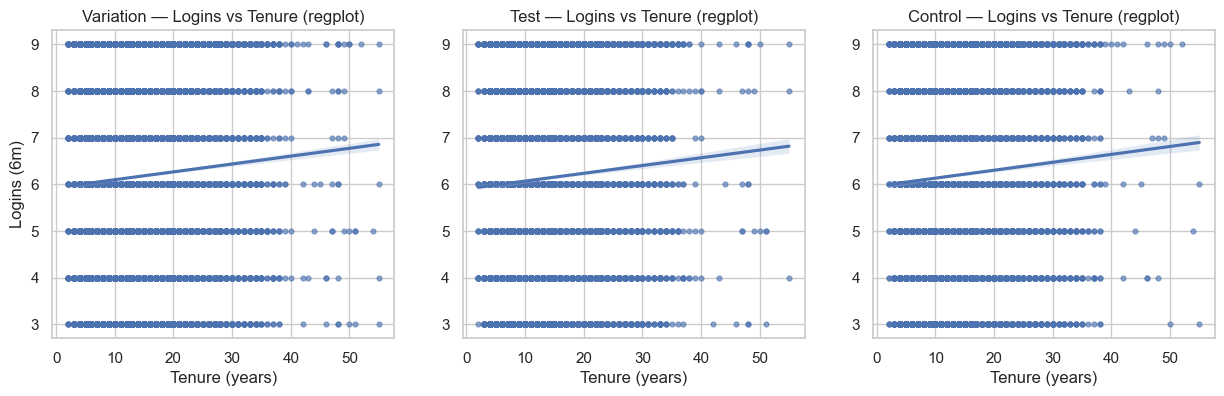

In [18]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.regplot(data=df_demo_variation[['clnt_tenure_yr','logons_6_mnth']].dropna(), x='clnt_tenure_yr', y='logons_6_mnth', scatter_kws={'s':12, 'alpha':0.6})
plt.title("Variation — Logins vs Tenure (regplot)")
plt.xlabel("Tenure (years)")
plt.ylabel("Logins (6m)")

plt.subplot(1,3,2)
sns.regplot(data=df_demo_test[['clnt_tenure_yr','logons_6_mnth']].dropna(), x='clnt_tenure_yr', y='logons_6_mnth', scatter_kws={'s':12, 'alpha':0.6})
plt.title("Test — Logins vs Tenure (regplot)")
plt.xlabel("Tenure (years)")
plt.ylabel("")

plt.subplot(1,3,3)
sns.regplot(data=df_demo_control[['clnt_tenure_yr','logons_6_mnth']].dropna(), x='clnt_tenure_yr', y='logons_6_mnth', scatter_kws={'s':12, 'alpha':0.6})
plt.title("Control — Logins vs Tenure (regplot)")
plt.xlabel("Tenure (years)")
plt.ylabel("")

plt.show()

**10) Wealthy calls more/less? (calls vs. balance, scatter with trend)**

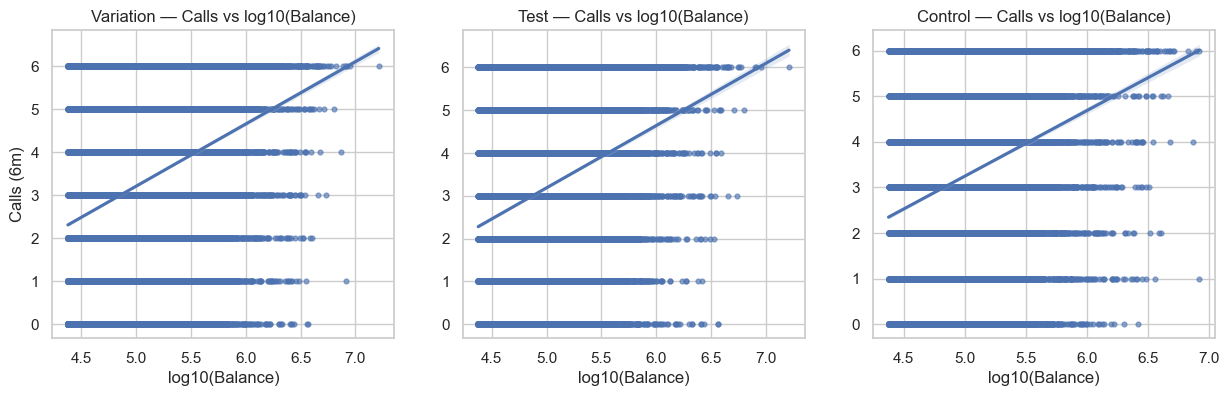

In [19]:
# Use log10(balance) to compress queues
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
d_variation = df_demo_variation[['bal','calls_6_mnth']].dropna()
d_variation = d_variation[d_variation['bal']>0] # avoid log of 0 or negative
d_variation['log10_bal'] = np.log10(d_variation['bal'])
sns.regplot(data=d_variation, x='log10_bal', y='calls_6_mnth', scatter_kws={'s':12, 'alpha':0.6})
plt.title("Variation — Calls vs log10(Balance)")
plt.xlabel("log10(Balance)")
plt.ylabel("Calls (6m)")

plt.subplot(1,3,2)
d_test = df_demo_test[['bal','calls_6_mnth']].dropna()
d_test = d_test[d_test['bal']>0] # avoid log of 0 or negative
d_test['log10_bal'] = np.log10(d_test['bal'])
sns.regplot(data=d_test, x='log10_bal', y='calls_6_mnth', scatter_kws={'s':12, 'alpha':0.6})
plt.title("Test — Calls vs log10(Balance)")
plt.xlabel("log10(Balance)")
plt.ylabel("")

plt.subplot(1,3,3)
d_control = df_demo_control[['bal','calls_6_mnth']].dropna()
d_control = d_control[d_control['bal']>0] # avoid log of 0 or negative
d_control['log10_bal'] = np.log10(d_control['bal'])
sns.regplot(data=d_control, x='log10_bal', y='calls_6_mnth', scatter_kws={'s':12, 'alpha':0.6})
plt.title("Control — Calls vs log10(Balance)")
plt.xlabel("log10(Balance)")
plt.ylabel("")

plt.show()

**11) Distribution of num_accts and single-account ratio**

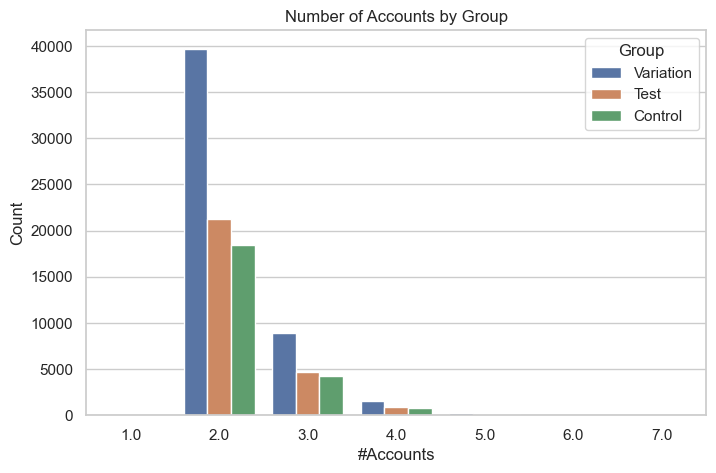

Group,Control,Test,Variation
1.0,0.0,1.000000,1.00000
2.0,18410.0,21310.000000,39720.00000
3.0,4251.0,4696.000000,8947.00000
4.0,745.0,840.000000,1585.00000
5.0,108.0,97.000000,205.00000
6.0,10.0,13.000000,23.00000
7.0,2.0,4.000000,6.00000
single_acct_prop,0.0,0.000037,0.00002


In [27]:
# Create a new DataFrame with "num_accts" and "group" columns
df_plot = pd.concat([
    df_demo_variation[['num_accts']].assign(group='Variation'),
    df_demo_test[['num_accts']].assign(group='Test'),
    df_demo_control[['num_accts']].assign(group='Control')
])

plt.figure(figsize=(8,5))
sns.countplot(data=df_plot, x='num_accts', hue='group', dodge=True)
plt.title("Number of Accounts by Group")
plt.xlabel("#Accounts")
plt.ylabel("Count")
plt.legend(title="Group")
plt.show()

# Single-Account Proportion
def num_accts_summary(frames):
    df_all = pd.concat([df.assign(Group=g) for g, df in frames], ignore_index=True)
    counts = pd.crosstab(df_all['num_accts'], df_all['Group'])
    single = (counts.loc[1] / counts.sum()).to_frame().T if 1 in counts.index else pd.DataFrame()
    if not single.empty:
        single.index = ['single_acct_prop']
        counts = pd.concat([counts, single])
    return counts#.astype(int)

# Build a single combined dataframe with a Group label
frames = [
    ('Variation', df_demo_variation),
    ('Test',      df_demo_test),
    ('Control',   df_demo_control)
]
summary_counts_only = num_accts_summary(frames)
display(summary_counts_only)

**12) Missingness (per column and group)**

In [21]:
cols = df_demo_variation.columns

miss_v = df_demo_variation[cols].isna().mean().rename("Variation")
miss_t = df_demo_test[cols].isna().mean().rename("Test")
miss_c = df_demo_control[cols].isna().mean().rename("Control")

miss_df = pd.concat([miss_v, miss_t, miss_c], axis=1)
display(miss_df)

,Variation,Test,Control
client_id,0.0,0.0,0.0
clnt_tenure_yr,0.0,0.0,0.0
clnt_tenure_mnth,0.0,0.0,0.0
clnt_age,0.0,0.0,0.0
num_accts,0.0,0.0,0.0
bal,0.0,0.0,0.0
calls_6_mnth,0.0,0.0,0.0
logons_6_mnth,0.0,0.0,0.0
Variation,0.0,0.0,0.0
clnt_age_quantile,0.0,0.0,0.0
